# Linear Regression in R

To be able to run the code in this tutorial and complete your HW/lab assignments, you need to **install** and **library** the following packages: 
- **ggplot2**
- **MASS**  

Since **ggplot2** is pre-installed in Jupyter, and we have already used it in RStudio, I'll demonstrate the process with the MASS package only:

In [1]:
install.packages("MASS")
library(MASS)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



Both the homework and lab this week use data coming directly from R (HW) or the MASS package (Lab), so you **don’t need to download or import any files this week**. 

Since the commands in both assignments are similar and only the data is different, we will focus on the HW data but the same logic applies to your Lab assignment as well. 

### Linear Regression with Airquality Dataset (HW)

The **airquality** data your homework assignment uses is a built-in R dataset. As such, it comes with **metadata** (information about the data) we can access with the **help** function:

In [24]:
?airquality

We can see the info about each of the 6 variables - it looks like the dataset features air quality measurements over a period of time back in 1973. Let's take a closer look at the structure of the data:

In [3]:
str(airquality)

'data.frame':	153 obs. of  6 variables:
 $ Ozone  : int  41 36 12 18 NA 28 23 19 8 NA ...
 $ Solar.R: int  190 118 149 313 NA NA 299 99 19 194 ...
 $ Wind   : num  7.4 8 12.6 11.5 14.3 14.9 8.6 13.8 20.1 8.6 ...
 $ Temp   : int  67 72 74 62 56 66 65 59 61 69 ...
 $ Month  : int  5 5 5 5 5 5 5 5 5 5 ...
 $ Day    : int  1 2 3 4 5 6 7 8 9 10 ...


How about some summary statistics?

In [4]:
summary(airquality)

     Ozone           Solar.R           Wind             Temp      
 Min.   :  1.00   Min.   :  7.0   Min.   : 1.700   Min.   :56.00  
 1st Qu.: 18.00   1st Qu.:115.8   1st Qu.: 7.400   1st Qu.:72.00  
 Median : 31.50   Median :205.0   Median : 9.700   Median :79.00  
 Mean   : 42.13   Mean   :185.9   Mean   : 9.958   Mean   :77.88  
 3rd Qu.: 63.25   3rd Qu.:258.8   3rd Qu.:11.500   3rd Qu.:85.00  
 Max.   :168.00   Max.   :334.0   Max.   :20.700   Max.   :97.00  
 NA's   :37       NA's   :7                                       
     Month            Day      
 Min.   :5.000   Min.   : 1.0  
 1st Qu.:6.000   1st Qu.: 8.0  
 Median :7.000   Median :16.0  
 Mean   :6.993   Mean   :15.8  
 3rd Qu.:8.000   3rd Qu.:23.0  
 Max.   :9.000   Max.   :31.0  
                               

To make it easier to work with the data, let's copy its contents to a dataframe called **air**:

In [5]:
air <- airquality

We can now summarize the data once again, just to verify we copied everything:

In [6]:
str(air)
summary(air)

'data.frame':	153 obs. of  6 variables:
 $ Ozone  : int  41 36 12 18 NA 28 23 19 8 NA ...
 $ Solar.R: int  190 118 149 313 NA NA 299 99 19 194 ...
 $ Wind   : num  7.4 8 12.6 11.5 14.3 14.9 8.6 13.8 20.1 8.6 ...
 $ Temp   : int  67 72 74 62 56 66 65 59 61 69 ...
 $ Month  : int  5 5 5 5 5 5 5 5 5 5 ...
 $ Day    : int  1 2 3 4 5 6 7 8 9 10 ...


     Ozone           Solar.R           Wind             Temp      
 Min.   :  1.00   Min.   :  7.0   Min.   : 1.700   Min.   :56.00  
 1st Qu.: 18.00   1st Qu.:115.8   1st Qu.: 7.400   1st Qu.:72.00  
 Median : 31.50   Median :205.0   Median : 9.700   Median :79.00  
 Mean   : 42.13   Mean   :185.9   Mean   : 9.958   Mean   :77.88  
 3rd Qu.: 63.25   3rd Qu.:258.8   3rd Qu.:11.500   3rd Qu.:85.00  
 Max.   :168.00   Max.   :334.0   Max.   :20.700   Max.   :97.00  
 NA's   :37       NA's   :7                                       
     Month            Day      
 Min.   :5.000   Min.   : 1.0  
 1st Qu.:6.000   1st Qu.: 8.0  
 Median :7.000   Median :16.0  
 Mean   :6.993   Mean   :15.8  
 3rd Qu.:8.000   3rd Qu.:23.0  
 Max.   :9.000   Max.   :31.0  
                               

Before we start analyzing the data, let's check for **missing values (NAs)** in each of the following 3 variables we'll use in our analysis: 
- **Solar.R**
- **Wind**
- **Temp**


(We'll follow the same procedure we used in HW6 - feel free to re-vist our work there) using the **is.na()** function, no need to focus on the time variables at this point:

In [9]:
air$Solar.R[is.na(air$Solar.R)]
# 7 missing observations in the Solar.R column

[1] NA NA NA NA NA NA NA

In [10]:
air$Wind[is.na(air$Wind)]
#no missing values here

numeric(0)

In [11]:
air$Temp[is.na(air$Temp)]
#no NAs here either

integer(0)

**Remember**: R doesn't like it when numeric columns in your dataframe have NAs because it can't perform math functions on them properly. That's why it's important to detect and transforms NAs into something meaningful. We'll use the **imputeTS** package, just like we did in HW 6:

In [13]:
install.packages("imputeTS")
library(imputeTS)

air$Solar.R <- na_interpolation(air$Solar.R)
air$Wind <- na_interpolation(air$Wind)
air$Temp <- na_interpolation(air$Temp)

also installing the dependencies ‘png’, ‘jpeg’, ‘gridtext’, ‘ggtext’, ‘stinepack’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



Now let's run the **is.na()** function on the 3 variables again to make sure all NAs have been taken care of:

In [14]:
air$Solar.R[is.na(air$Solar.R)]
air$Wind[is.na(air$Wind)]
air$Temp[is.na(air$Temp)]
# All missing data has been fixed

numeric(0)

numeric(0)

integer(0)

For our analysis, let’s focus on **Temp** as our **outcome variable**, and try to see how it depends on **Solar.R** and **Wind**, which will serve as **predictor variables**.

Let’s examine the relationship between **Temp** and each of the 2 predictors by plotting a scatterplot for each pair. You can figure out the 2nd one by yourself. Note that the outcome variable, **Temp**, goes on the **y-axis**.


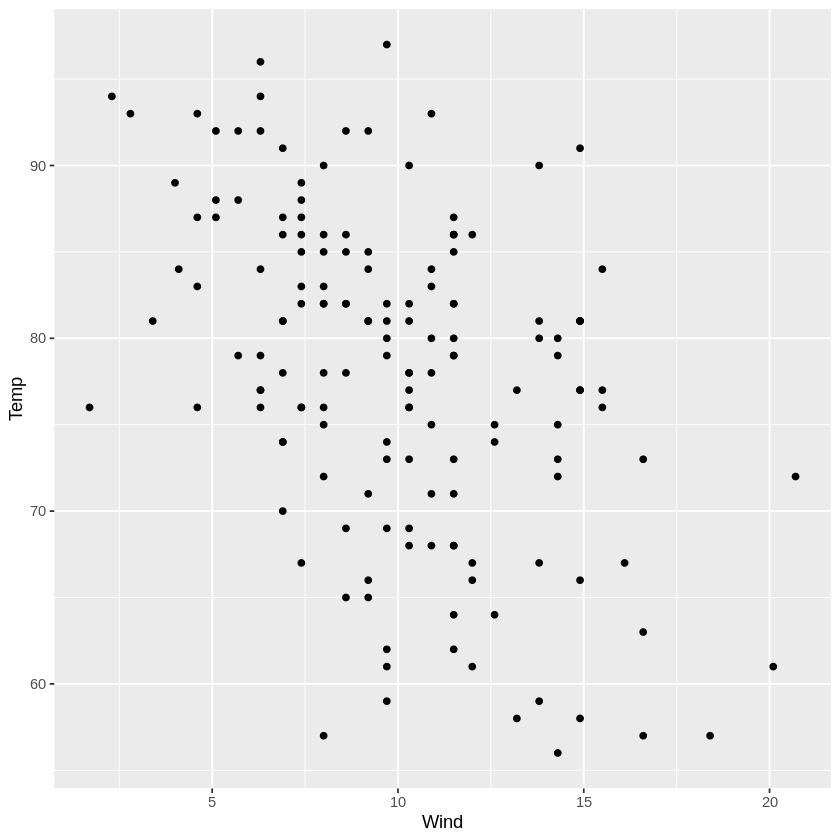

In [19]:
library(ggplot2)

ggplot(data=air) + aes(x=Wind, y=Temp) + geom_point() 

#A somewhat negative relationship seems to be taking place - as wind speed picks up, temperature tends to decrease.

Let's continue exploring these relationships by creating a linear regression model where we try to predict changes in **Temp** based on **Wind**:

In [20]:
lmOut <- lm(Temp ~ Wind, data=air)


We use the R **lm()** function which stands for **“linear model”** to create a model where the **outcome variable** is **Temp** and it is predicted by the **predictor variable Wind**, both coming from the **air** dataset. We store our model in a variable called **lmOut**. 

Let’s examine the **results** of the model with the **summary()** function:

In [21]:
summary(lmOut)


Call:
lm(formula = Temp ~ Wind, data = air)

Residuals:
    Min      1Q  Median      3Q     Max 
-23.291  -5.723   1.709   6.016  19.199 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  90.1349     2.0522  43.921  < 2e-16 ***
Wind         -1.2305     0.1944  -6.331 2.64e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.442 on 151 degrees of freedom
Multiple R-squared:  0.2098,	Adjusted R-squared:  0.2045 
F-statistic: 40.08 on 1 and 151 DF,  p-value: 2.642e-09


Let's unpack this output line by line:

<img src="https://ist387.s3.us-east-2.amazonaws.com/images/lm1.png">

Looking at the **Adjusted R-squared** value of this model, we can see that it explains a small amount of the variation in **Temp**. We can try to improve that by adding predictors to the model – turning our simple regression into **multiple regression**:

In [23]:
#Model with 2 predictors
lmOut1 <- lm(Temp ~ Wind + Solar.R, data=air)
summary(lmOut1)


Call:
lm(formula = Temp ~ Wind + Solar.R, data = air)

Residuals:
    Min      1Q  Median      3Q     Max 
-22.167  -5.301   1.178   5.183  18.440 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 85.675648   2.468453  34.708  < 2e-16 ***
Wind        -1.213450   0.189226  -6.413 1.76e-09 ***
Solar.R      0.022932   0.007461   3.074  0.00251 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.215 on 150 degrees of freedom
Multiple R-squared:  0.2566,	Adjusted R-squared:  0.2467 
F-statistic: 25.88 on 2 and 150 DF,  p-value: 2.202e-10


Here are the **coefficients**, aka **slopes**, aka **weights**, associated with the statistically significant predictors:
-1.21 for **Wind** and 0.02 for **Solar.R**.


How do we interpret them? Let’s start with the relationship between **Temp** and **Wind**:

We can see that the **coefficient is negative**, meaning that as **Wind** speed **increases**, **Temp** is likely to **decrease**. 

The general **interpretation** of the predictor coefficient is as follows: 

**for each unit change in the predictor, the dependent variable increases/decreases by the amount of the predictor’s coefficient.** 

In our case, the coefficient of **Wind** can be interpreted as follows: For each additional mile per hour increase in wind speed, temperature is likely to drop by 1.21 degrees Fahrenheit.

Now, for **Solar.R**: For each additional unit increase in Solar.R, temperature is likely to increase by 0.02 degrees.

Regression models can also be used for **prediction**, i.e. given values of your predictor variables, what is the likeliest value of the dependent variable? 

Let’s try it with the following values for our predictors, saved in a dataframe:

In [25]:
predDF <- data.frame(Wind=9.7, Solar.R=205) #wind speed = 9.7 mph, Solar.R = 205 lang
predict(lmOut1, predDF) #The predicted temperature is 78.6 degrees Fahrenheit

1 
78.60618

Let’s change just one little thing – let’s increase wind speed by 1 mile/hr:

In [27]:
predDF <- data.frame(Wind=10.7, Solar.R=205) #wind speed = 10.7 mph, Solar.R = 205 lang
predict(lmOut1, predDF) #Notice temperature decreased by the exact value of the slope of Wind!


1 
77.39273